# The Titanic dataset
The [Titanic dataset](https://www.kaggle.com/c/titanic-dataset/data) contains the passengers of [the Titanic](https://en.wikipedia.org/wiki/Titanic#Collecting_passengers) (the actual boat, not the movie), together with features like the sex and age of the passenger. It is also known whether the passenger survived (1) or not (0). Let us build a model to predict if a passenger survived. We will use the same mantra as always:

    1. frame the problem
    2. load the data
    3. inspect the data
    4. preprocess the data (clean, normalize)
    5. split the data
    6. train the model
    7. evaluate the model

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# getting the data

In [2]:
# load the data
url = 'data/titanic.csv'
df = pd.read_csv(url)
df.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']


In [3]:
# inspect the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

# Cleaning the data

In [ ]:
# Check de class variabele 
df.Survived.value_counts().plot(kind='barh')


In [ ]:
## Check missing values
# we can check easily with the isnull() method
df.isnull().sum()
#set contains missing values on Age and Cabin

In [ ]:
df.info()

--- 
We cannot remove the feature `Age`, as too much data will be lost. Let see if we can use an intelligent fill method


<AxesSubplot:>

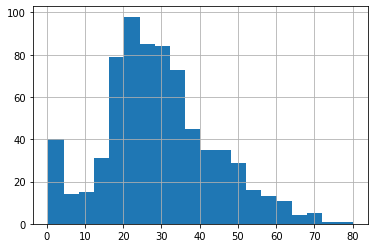

In [4]:
# plot the data
df.Age.hist(bins=20)

In [ ]:
# data is scattered, how to fill the missing data
# Could there be a relation with another factor?
c = df.corr().abs()
sns.heatmap(c)

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=df, palette='hls')

Roughly speaking, we can say that the younger a passenger is, the more likely he or she is to be in third grade. The older a passenger is, the more likely he or she is in first class. So there is a loose relationship between these variables. Let's write a function that approximates the age of the passenger, based on their class. The box plot shows that the average age of first class passengers is approximately 37, second class passengers are 29 and third class passengers are 24.

So our function needs to finds every zero value in the variable `Age` and checks the value of the `Pclass` for this observation and assigns an `Age` value based on the average age of passengers in that class.

In [5]:
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [6]:
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# most likely the ID, Name, Ticket and Cabin are not relevant; let's remove them
df = df.drop(['PassengerId','Name','Ticket','Cabin'], 1)
df.isnull().sum()

/var/folders/sh/djdw6j_j1zbfpbcf7k2z77rc0000gp/T/ipykernel_1469/1787645108.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(['PassengerId','Name','Ticket','Cabin'], 1)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
#deleting two rows is also not of importance
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [12]:
#we need to make some columns numerical
df['Sex'] = df['Sex'].map({'female': '1', 'male': '0'})

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [ ]:
df.Embarked.value_counts().plot(kind='barh')

Since we need to have numerical data for our classifiers, we still need to assign the embarkment-place to an integer. We (kind of arbitrarily) map Cherbourg to 1, Southampton to 2 and Queenstown to 3.

In [13]:
df['Embarked'] = df['Embarked'].map({'C': '1', 'S': '2', 'Q': '3'})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [15]:
# change the features Sex and Embarked to numbers
df['Sex'] = pd.to_numeric(df['Sex'])
df['Embarked'] = pd.to_numeric(df['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


# preparing the data

In [17]:
#get X and y
y = np.array(df['Survived']) # this is what we want to predict (vector)
X = np.array(df.iloc[:,1:8]) # these are the features (matrix)
X.shape

(889, 7)

In [18]:
# Normalize the data
def normalize(X):
    scaler = StandardScaler()
    scaler = scaler.fit(X)
    X = scaler.transform(X)
    return X

X = normalize(X)

In [22]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# train the model
logreg = LogisticRegression()
history = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [20]:
# Evaluate
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[138  29]
 [ 26  74]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       167
           1       0.72      0.74      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.80      0.79      0.79       267



In [21]:
print(logreg.coef_)

[[-0.92207297  1.31794904 -0.65232495 -0.48205671 -0.05747359  0.12832454
  -0.16918916]]
